In [5]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [48]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# machine learning
from sklearn.model_selection import train_test_split, StratifiedKFold
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD
#Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#tuning
import keras_tuner as kt

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [98]:
train_df=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

sample_submission=pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

orig_df=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv').rename(columns={'RowNumber':'id'})

In [99]:
orig_df

id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0          1    15634602   Hargrave          619    France  Female  42.0   
1          2    15647311       Hill          608     Spain  Female  41.0   
2          3    15619304       Onio          502    France  Female  42.0   
3          4    15701354       Boni          699    France  Female  39.0   
4          5    15737888   Mitchell          850     Spain  Female  43.0   
...      ...         ...        ...          ...       ...     ...   ...   
9997    9998    15584532        Liu          709    France  Female  36.0   
9998    9999    15682355  Sabbatini          772   Germany    Male  42.0   
9999    9999    15682355  Sabbatini          772   Germany    Male  42.0   
10000  10000    15628319     Walker          792    France  Female  28.0   
10001  10000    15628319     Walker          792    France  Female  28.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0           2       0.00              1        1.0             1.0   
1           1   83807.86              1        0.0             1.0   
2           8  159660.80              3        1.0             0.0   
3           1       0.00              2        0.0             0.0   
4           2  125510.82              1        NaN             1.0   
...       ...        ...            ...        ...             ...   
9997        7       0.00              1        0.0             1.0   
9998        3   75075.31              2        1.0             0.0   
9999        3   75075.31              2        1.0             0.0   
10000       4  130142.79              1        1.0             0.0   
10001       4  130142.79              1        1.0             0.0   

       EstimatedSalary  Exited  
0            101348.88       1  
1            112542.58       0  
2            113931.57       1  
3             93826.63       0  
4             79084.10       0  
...                ...     ...  
9997          42085.58       1  
9998          92888.52       1  
9999          92888.52       1  
10000         38190.78       0  
10001         38190.78       0  

[10002 rows x 14 columns]

In [100]:
train_df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  
165033         61581.79       1  

[165034 rows x 14 columns]

In [61]:
test_data

id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0       165034    15773898   Lucchese          586    France  Female  23.0   
1       165035    15782418       Nott          683    France  Female  46.0   
2       165036    15807120         K?          656    France  Female  34.0   
3       165037    15808905  O'Donnell          681    France    Male  36.0   
4       165038    15607314    Higgins          752   Germany    Male  38.0   
...        ...         ...        ...          ...       ...     ...   ...   
110018  275052    15662091      P'eng          570     Spain    Male  29.0   
110019  275053    15774133        Cox          575    France  Female  36.0   
110020  275054    15728456      Ch'iu          712    France    Male  31.0   
110021  275055    15687541   Yegorova          709    France  Female  32.0   
110022  275056    15663942       Tuan          621    France  Female  37.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0            2       0.00              2        0.0             1.0   
1            2       0.00              1        1.0             0.0   
2            7       0.00              2        1.0             0.0   
3            8       0.00              1        1.0             0.0   
4           10  121263.62              1        1.0             0.0   
...        ...        ...            ...        ...             ...   
110018       7  116099.82              1        1.0             1.0   
110019       4  178032.53              1        1.0             1.0   
110020       2       0.00              2        1.0             0.0   
110021       3       0.00              1        1.0             1.0   
110022       7   87848.39              1        1.0             0.0   

        EstimatedSalary  
0             160976.75  
1              72549.27  
2             138882.09  
3             113931.57  
4             139431.00  
...                 ...  
110018        148087.62  
110019         42181.68  
110020         16287.38  
110021        158816.58  
110022         24210.56  

[110023 rows x 13 columns]

In [12]:
sample_submission

id  Exited
0       165034     0.5
1       165035     0.5
2       165036     0.5
3       165037     0.5
4       165038     0.5
...        ...     ...
110018  275052     0.5
110019  275053     0.5
110020  275054     0.5
110021  275055     0.5
110022  275056     0.5

[110023 rows x 2 columns]

In [62]:
pd.concat([train_df,orig_df]).duplicated().sum() #only two duplicated items

2

In [63]:
train_df=pd.concat([train_df,orig_df])
train_df.drop(['id'],axis=1,inplace=True)
train_df.shape

(175036, 13)

In [64]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = train_df.shape

num_test_rows, num_test_columns = test_data.shape

num_submission_rows, num_submission_columns = sample_submission.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Submission Data:")
print(f"Number of Rows: {num_submission_rows}")
print(f"Number of Columns: {num_submission_columns}")

Training Data:
Number of Rows: 175036
Number of Columns: 13

Test Data:
Number of Rows: 110023
Number of Columns: 13

Submission Data:
Number of Rows: 110023
Number of Columns: 2


In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175036 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       175036 non-null  int64  
 1   Surname          175036 non-null  object 
 2   CreditScore      175036 non-null  int64  
 3   Geography        175035 non-null  object 
 4   Gender           175036 non-null  object 
 5   Age              175035 non-null  float64
 6   Tenure           175036 non-null  int64  
 7   Balance          175036 non-null  float64
 8   NumOfProducts    175036 non-null  int64  
 9   HasCrCard        175035 non-null  float64
 10  IsActiveMember   175035 non-null  float64
 11  EstimatedSalary  175036 non-null  float64
 12  Exited           175036 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 18.7+ MB


In [66]:
train_df.select_dtypes(include='object').nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [67]:
# Null Values in Train 
train_null = train_df.isnull().sum().sum()

#Null Count in Test 
test_null = test_data.isnull().sum().sum()

#null Count in Submission
submission_null = sample_submission.isnull().sum().sum()

print(f'Null Count in Train: {train_null}')
print(f'Null Count in Test: {test_null}')
print(f'Null Count in Submission: {submission_null}')

Null Count in Train: 4
Null Count in Test: 0
Null Count in Submission: 0


In [68]:
train_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [69]:
# there are only 4 null values in train data that we will drop
train_df.dropna(inplace=True)

# Data Analysis

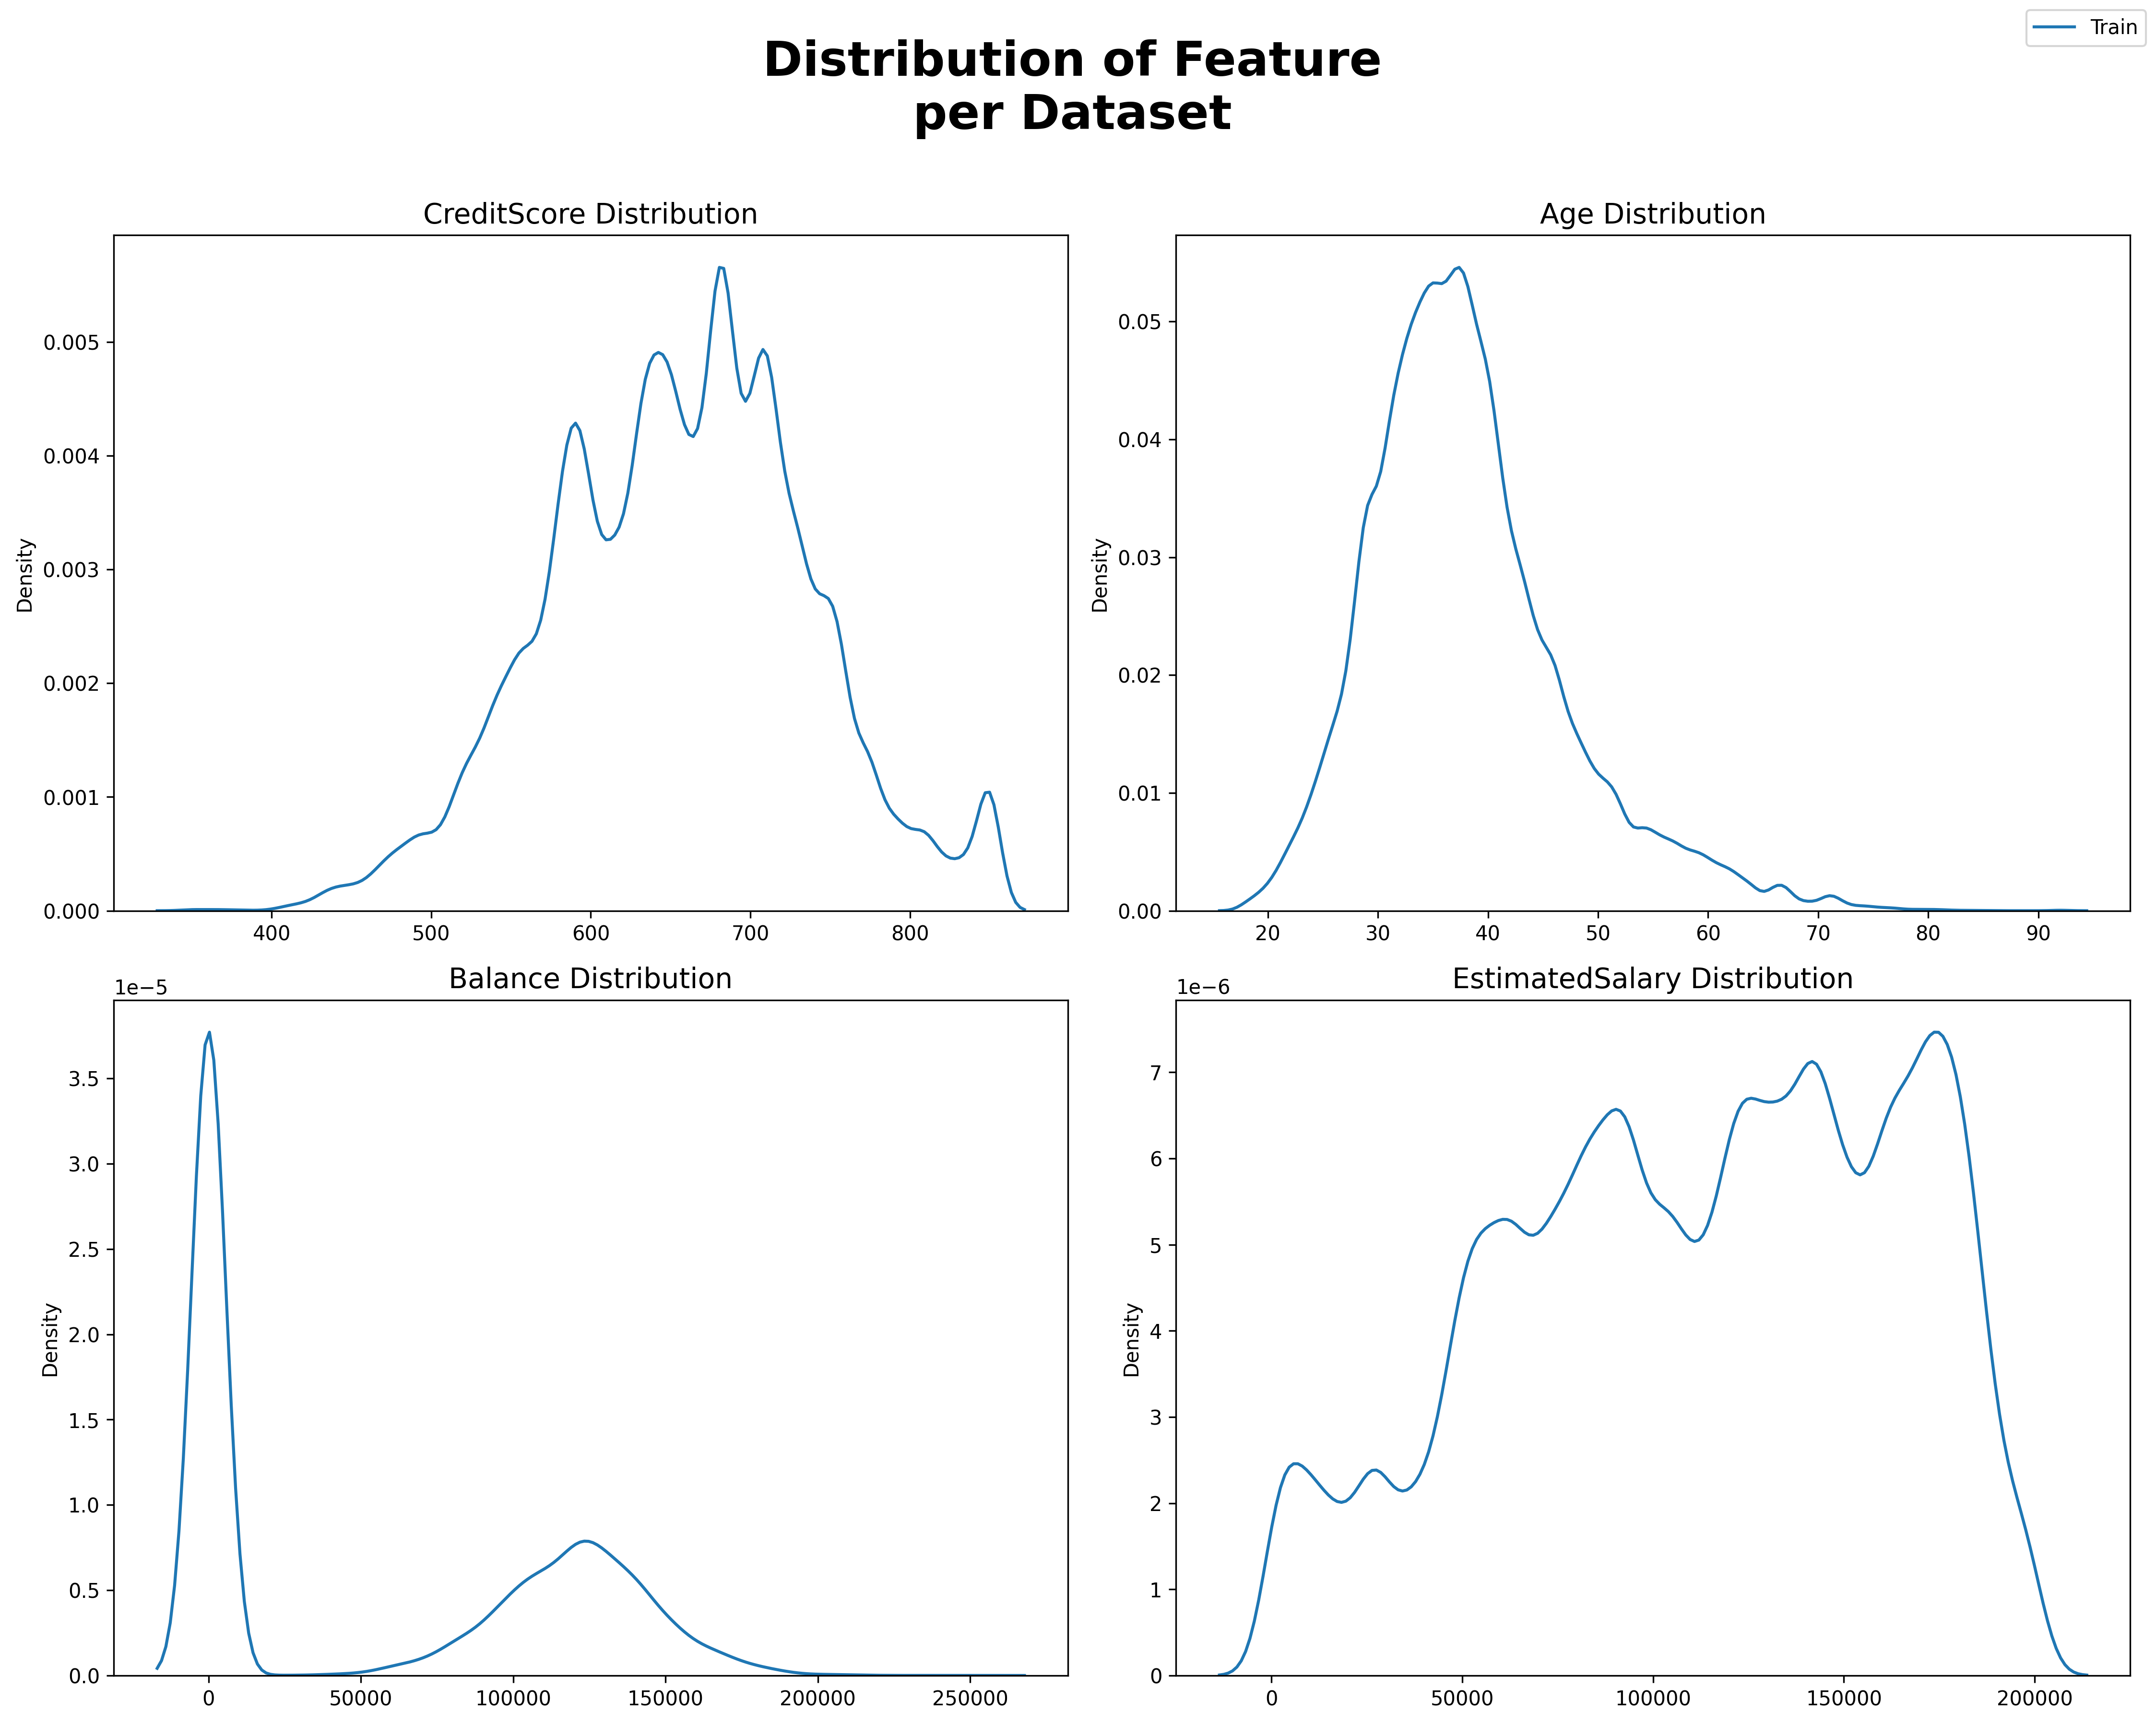

In [70]:
# Numeric Feature Distribution
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
fig, ax = plt.subplots(2, 2, figsize = (15, 12), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(num_cols):
    sns.kdeplot(train_df[column], ax=ax[i])        
    ax[i].set_title(f'{column} Distribution', size = 14)
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train'])
plt.tight_layout()

In [71]:
# Outliers ?

# Create subplots with two rows and two columns
fig = make_subplots(rows=2, cols=2)

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(num_cols, start=1):
    row_num = 1 if i <= 2 else 2
    col_num = i if i <= 2 else i - 2
    fig.add_trace(
        go.Box(
            x=train_df[col],
            name=col
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(
    title_text="Boxplots of Numerical Columns",
    showlegend=False
)

fig.show()

# Feature Engineering
The getFeats function enhances a given DataFrame by creating new features based on existing ones. Here's a concise summary of the code:

1. **Senior**: Adds a binary column indicating whether a person is a senior (age 60 or above).

2. **Active_by_CreditCard**: Multiplies the binary columns 'HasCrCard' and 'IsActiveMember' to create a new feature.

3. **Products_Per_Tenure**: Calculates the ratio of 'Tenure' to 'NumOfProducts' and creates a new column.

4. **AgeCat**: Divides ages by 20, rounds the result, and converts it to a categorical variable.

In [72]:
def feature_data(df):
    
    df['Senior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
    df['Active_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
    df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category')

    return df

In [74]:
#Genrating New Features
train_df = feature_data(train_df)
test_data = feature_data(test_data)

print((train_df.shape, test_data.shape))

((175032, 17), (110023, 17))


In [75]:
train_df.head()

CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2    15694510           Hsueh          678    France   Male  40.0      10   
3    15741417             Kao          581    France   Male  34.0       2   
4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  Senior  Active_by_CreditCard  Products_Per_Tenure AgeCat  
0       0       0                   0.0                  1.5      2  
1       0       0                   1.0                  0.5      2  
2       0       0                   0.0                  5.0      2  
3       0       0                   1.0                  2.0      2  
4       0       0                   1.0                  2.5      2

In [76]:
# drop Surname and CustomerID
train_df.drop(['Surname','CustomerId'],axis=1,inplace=True)
train_df.head()

CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
0          668    France   Male  33.0       3       0.00              2   
1          627    France   Male  33.0       1       0.00              2   
2          678    France   Male  40.0      10       0.00              2   
3          581    France   Male  34.0       2  148882.54              1   
4          716     Spain   Male  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Senior  \
0        1.0             0.0        181449.97       0       0   
1        1.0             1.0         49503.50       0       0   
2        1.0             0.0        184866.69       0       0   
3        1.0             1.0         84560.88       0       0   
4        1.0             1.0         15068.83       0       0   

   Active_by_CreditCard  Products_Per_Tenure AgeCat  
0                   0.0                  1.5      2  
1                   1.0                  0.5      2  
2                   0.0                  5.0      2  
3                   1.0                  2.0      2  
4                   1.0                  2.5      2

In [77]:
test_df = test_data.drop(['id','Surname','CustomerId'],axis=1)
test_df.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          586    France  Female  23.0       2       0.00              2   
1          683    France  Female  46.0       2       0.00              1   
2          656    France  Female  34.0       7       0.00              2   
3          681    France    Male  36.0       8       0.00              1   
4          752   Germany    Male  38.0      10  121263.62              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Senior  Active_by_CreditCard  \
0        0.0             1.0        160976.75       0                   0.0   
1        1.0             0.0         72549.27       0                   0.0   
2        1.0             0.0        138882.09       0                   0.0   
3        1.0             0.0        113931.57       0                   0.0   
4        1.0             0.0        139431.00       0                   0.0   

   Products_Per_Tenure AgeCat  
0                  1.0      1  
1                  2.0      2  
2                  3.5      2  
3                  8.0      2  
4                 10.0      2

In [78]:
print((train_df.shape, test_df.shape))

((175032, 15), (110023, 14))


In [79]:
numerical_cols = test_df.select_dtypes(include=['int', 'float']).columns.tolist()
print(f'Number of numeric columns:  {len(numerical_cols)}')
print(numerical_cols)

Number of numeric columns:  11
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Senior', 'Active_by_CreditCard', 'Products_Per_Tenure']


In [80]:
categorical_cols = test_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Number of numeric columns:  {len(categorical_cols)}')
print(categorical_cols)

Number of numeric columns:  3
['Geography', 'Gender', 'AgeCat']


# Modeling

In [81]:
my_cols = categorical_cols + numerical_cols

X = train_df[my_cols].copy()
y = train_df.Exited

final_test_df = test_df[my_cols].copy()

In [82]:
# Get 80% of the dataset as the training set. Put the remaining 20% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.20, random_state=1)

# Split the 20% subset above into two: one half for cross validation and the other for the test set
x_valid, x_test, y_valid, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_valid.shape}")
print(f"the shape of the cross validation set (target) is: {y_valid.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (140025, 14)
the shape of the training set (target) is: (140025,)

the shape of the cross validation set (input) is: (17503, 14)
the shape of the cross validation set (target) is: (17503,)

the shape of the test set (input) is: (17504, 14)
the shape of the test set (target) is: (17504,)


### Preprocessing Pipeline

In [83]:
numerical_transformer = Pipeline(steps=[
    ('scalar', StandardScaler()),
    ('MeanImputer', SimpleImputer())
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [84]:
new_X_train = pd.DataFrame(preprocessor.fit_transform(x_train))
new_X_valid = pd.DataFrame(preprocessor.transform(x_valid))
new_X_test = pd.DataFrame(preprocessor.transform(x_test))

new_final_test_df = pd.DataFrame(preprocessor.transform(final_test_df))

print(new_X_train.shape)
print(new_X_valid.shape)
print(new_X_test.shape)
print(new_final_test_df.shape)

(140025, 21)
(17503, 21)
(17504, 21)
(110023, 21)


## Basic Neural Network

In [35]:
model = keras.Sequential([
#     layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', input_shape=[new_X_train.shape[1]]),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              22528     
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 301441 (1.15 MB)
Trainable params: 301441 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [37]:
history = model.fit(
    new_X_train, y_train,
    validation_data=(new_X_valid, y_valid),
    batch_size=100,
    epochs=100,
    callbacks=[early_stopping]
    #verbose=0, # hide the output because we have so many epochs
)

Epoch 1/100
1401/1401 [==============================] - 8s 4ms/step - loss: 0.3360 - auc: 0.8755 - val_loss: 0.3254 - val_auc: 0.8841
Epoch 2/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.3277 - auc: 0.8824 - val_loss: 0.3232 - val_auc: 0.8861
Epoch 3/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.3263 - auc: 0.8834 - val_loss: 0.3226 - val_auc: 0.8865
Epoch 4/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.3250 - auc: 0.8844 - val_loss: 0.3224 - val_auc: 0.8862
Epoch 5/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.3246 - auc: 0.8846 - val_loss: 0.3228 - val_auc: 0.8874
Epoch 6/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.3236 - auc: 0.8854 - val_loss: 0.3216 - val_auc: 0.8877
Epoch 7/100
1401/1401 [==============================] - 5s 4ms/step - loss: 0.3232 - auc: 0.8857 - val_loss: 0.3212 - val_auc: 0.8876
Epoch 8/100
1401/1401 [==============================] 

Best Validation Loss: 0.3212
Best Validation AUC: 0.8878


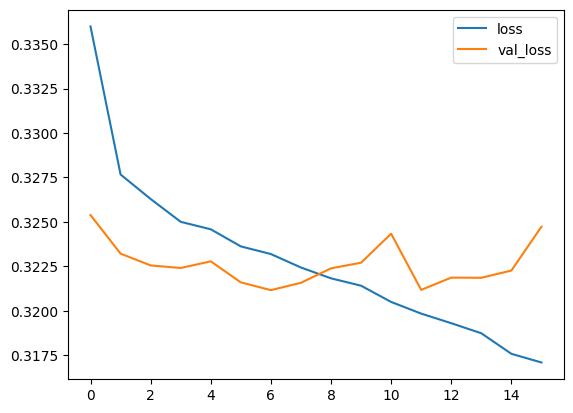

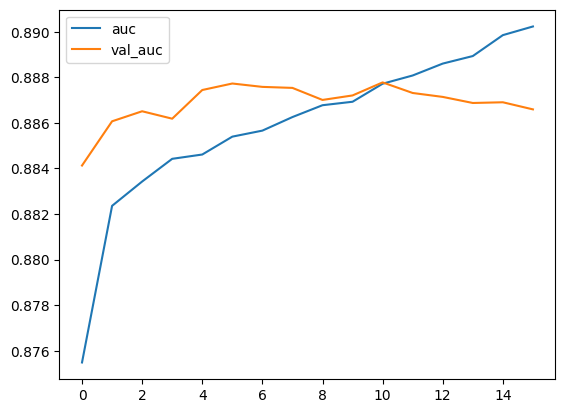

In [38]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:,['loss', 'val_loss']].plot()
history_df.loc[:, ['auc', 'val_auc']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation AUC: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_auc'].max()))

## Model Tuning

In [39]:
def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(21,)))

    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=100)
    hp_layer_3 = hp.Int('layer_3', min_value=1, max_value=1000, step=100)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.AUC()])

    return model

In [40]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective("val_auc", direction="max"),  # Specify direction as "max"
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x')

In [41]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True)

In [45]:
tuner.search(new_X_train, y_train, epochs=50, validation_data=(new_X_valid, y_valid), callbacks=[stop_early])

Trial 30 Complete [00h 02m 43s]
val_auc: 0.8871222734451294

Best val_auc So Far: 0.8883451223373413
Total elapsed time: 00h 35m 14s


In [46]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [49]:
best_model = tuner.hypermodel.build(best_hps)
best_history = best_model.fit(new_X_train, y_train, epochs=50, validation_data=(new_X_valid, y_valid),
                    callbacks=[stop_early])

Epoch 1/50
4376/4376 [==============================] - 18s 4ms/step - loss: 0.3494 - auc_2: 0.8644 - val_loss: 0.3263 - val_auc_2: 0.8844
Epoch 2/50
4376/4376 [==============================] - 17s 4ms/step - loss: 0.3318 - auc_2: 0.8793 - val_loss: 0.3269 - val_auc_2: 0.8839
Epoch 3/50
4376/4376 [==============================] - 17s 4ms/step - loss: 0.3289 - auc_2: 0.8814 - val_loss: 0.3252 - val_auc_2: 0.8843
Epoch 4/50
4376/4376 [==============================] - 17s 4ms/step - loss: 0.3272 - auc_2: 0.8827 - val_loss: 0.3248 - val_auc_2: 0.8846
Epoch 5/50
4376/4376 [==============================] - 17s 4ms/step - loss: 0.3267 - auc_2: 0.8831 - val_loss: 0.3256 - val_auc_2: 0.8866
Epoch 6/50
4376/4376 [==============================] - 17s 4ms/step - loss: 0.3260 - auc_2: 0.8835 - val_loss: 0.3203 - val_auc_2: 0.8881
Epoch 7/50
4376/4376 [==============================] - 17s 4ms/step - loss: 0.3257 - auc_2: 0.8839 - val_loss: 0.3210 - val_auc_2: 0.8875
Epoch 8/50
4376/4376 [=====

Best Validation Loss: 0.3203
Best Validation AUC: 0.8881


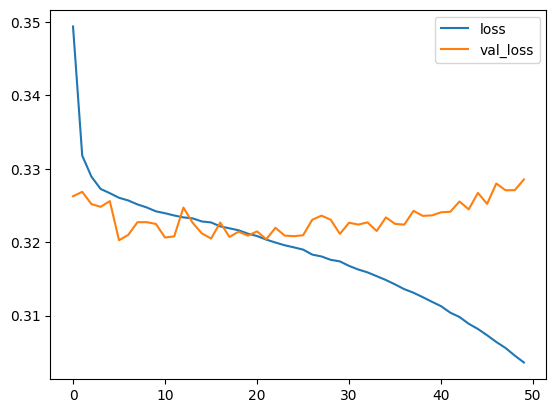

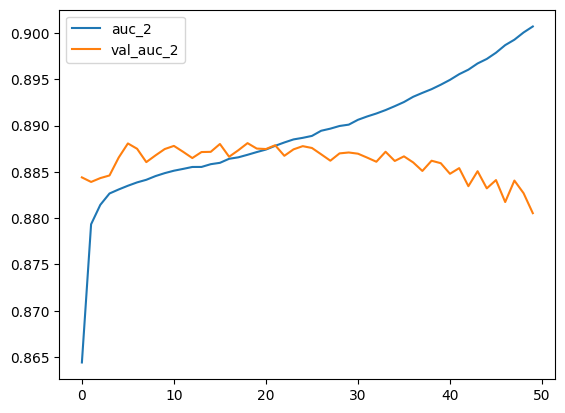

In [50]:
history_df = pd.DataFrame(best_history.history)
# Start the plot at epoch 5
history_df.loc[:,['loss', 'val_loss']].plot()
history_df.loc[:, ['auc_2', 'val_auc_2']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation AUC: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_auc_2'].max()))

In [54]:
y_pred = model.predict(new_X_test.astype('float32'))
y_pred

547/547 [==============================] - 1s 1ms/step


array([[0.0578901 ],
       [0.00391142],
       [0.01614408],
       ...,
       [0.47332275],
       [0.03899742],
       [0.28782085]], dtype=float32)

In [56]:
print("Best model ROC test score =",roc_auc_score(y_test,y_pred))

Best model ROC test score = 0.8883790560318856


# Prediction

In [95]:
prediction = model.predict(new_final_test_df.astype('float32'))
prediction

3439/3439 [==============================] - 5s 1ms/step


array([[0.02582956],
       [0.85786116],
       [0.02829352],
       ...,
       [0.01209618],
       [0.14345083],
       [0.22859427]], dtype=float32)

In [97]:
output = pd.DataFrame({
    "id": test_data["id"].to_list(),
    "Exited": prediction[:,0]
})

output

id    Exited
0       165034  0.025830
1       165035  0.857861
2       165036  0.028294
3       165037  0.246823
4       165038  0.444115
...        ...       ...
110018  275052  0.055478
110019  275053  0.089033
110020  275054  0.012096
110021  275055  0.143451
110022  275056  0.228594

[110023 rows x 2 columns]

In [101]:
output.to_csv('submission.csv', index=False)